In [1]:
import pandas as pd


In [2]:
# Get the notebook path
import pathlib
notebook_path = pathlib.Path.cwd()

# Target directory (Project Root)
target_dir = 'ai_practice'
project_root = ''

# Iterate over the notebook_path until we find the target directory
for parent in notebook_path.parents:
    # print(parent, parent.name)
    if parent.name == target_dir:
        project_root = parent
        
dataset_dir = 'domnic_celsius_to_fahrenheit/celsius.csv'
csv_path = project_root / 'assets/files' / dataset_dir

df = pd.read_csv(csv_path, sep=',')
df

,Celsius,Fahrenheit
0,1169,2136.2
1,1280,2336.0
2,2380,4316.0
3,1508,2746.4
4,2015,3659.0
...,...,...
15995,833,1531.4
15996,757,1394.6
15997,1584,2883.2
15998,2396,4344.8


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Celsius     16000 non-null  int64  
 1   Fahrenheit  16000 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 250.1 KB


In [4]:
X = df.Celsius.values
y = df.Fahrenheit.values

In [ ]:
# Train the tensorflow regression neural network model
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Input(shape=(1,)),  # Input shape is (1,) means the model expects one feature per sample
    keras.layers.Dense(units=1)
])

model.compile(
    optimizer=keras.optimizers.Adam(.1),  # The param inside the method .Adam() is the learning rate
    loss='mean_squared_error'
)

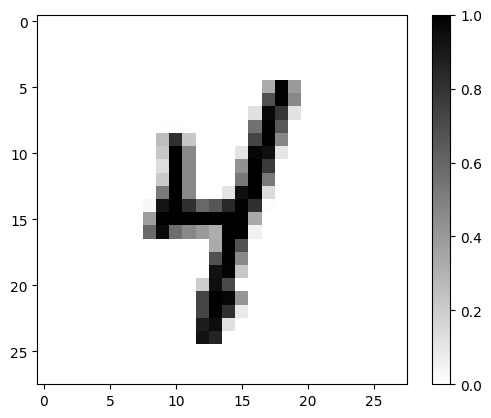

In [ ]:
# Show the first image
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(images, cmap=plt.cm.binary) # the `images` variable is actually the one set in the for loop in the immediate upper cell
plt.colorbar() # we see that it goes from 0 to 1, instead of 0 to 255
plt.show()

In [6]:
training = model.fit(X, y, epochs=100)

Epoch 1/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step - loss: 938807.3750 
Epoch 2/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step - loss: 205.0108
Epoch 3/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step - loss: 186.0048
Epoch 4/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step - loss: 161.0473
Epoch 5/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step - loss: 128.9063
Epoch 6/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step - loss: 97.8750
Epoch 7/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step - loss: 67.6506
Epoch 8/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step - loss: 41.7161
Epoch 9/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step - loss: 22.4927
Epoch 10/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step - loss: 10.0821
Epoch 11/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step - loss: 3.6763
Epoch 12/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step - loss: 1.0193
Epoch 13/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step - loss: 0.1799
Epoch 14/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step - loss: 0.0

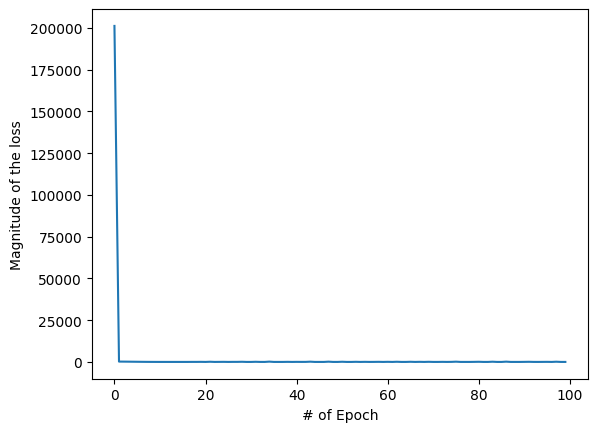

In [7]:
import matplotlib.pyplot as plt

plt.xlabel('# of Epoch')
plt.ylabel('Magnitude of the loss')
plt.plot(training.history['loss'])

In [8]:
# Ideally, the magnitude of the loss should decrease gradually to indicate that the model is learning. The plot above looks rather erratics or unusual. A few way to tweak around:
## 1. Lower the learning rate

model.compile(
    optimizer=keras.optimizers.Adam(.01),
    loss='mean_squared_error'
)

In [9]:
## 2. Data Normalization of the Input Feature (X). There are 5 methods for data normalization in general, Z-Score normalization is most suitable in this case, because:
### - Gradient Descent Optimization: The input features (Celsius values) and target values (Fahrenheit values) are on different scales, making the gradients during training vary widely. This can lead to slow convergence or unstable training. Z-Score normalization scales the input features (Celsius) to have a mean of 0 and standard deviation of 1, making the optimization process more efficient
### - Improved Model Performance: Without normalization, the model might give undue importance to features with larger scales, even if they are not actually more important. Z-score normalization ensures that all features contribute equally to the learning process, improving the model’s ability to learn the relationship between Celsius and Fahrenheit.
### - Handling Outliers: If your dataset has outliers (e.g., extremely high or low temperatures), they can distort the scaling in some other normalization methods like Min-Max normalization. Z-score normalization is less sensitive to outliers because it uses the mean and standard deviation, which are more robust to extreme values.

X_norm = (X - X.mean()) / (X.std())

In [10]:
training = model.fit(X_norm, y, epochs=100)

Epoch 1/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 467us/step - loss: 6826499.0000
Epoch 2/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 467us/step - loss: 6734541.5000
Epoch 3/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 495us/step - loss: 6768009.5000
Epoch 4/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 426us/step - loss: 6680497.0000
Epoch 5/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 423us/step - loss: 6571771.5000
Epoch 6/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 422us/step - loss: 6609125.0000
Epoch 7/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step - loss: 6543951.5000
Epoch 8/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step - loss: 6509126.5000
Epoch 9/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step - loss: 6552090.0000
Epoch 10/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step - loss: 6483138.5000
Epoch 11/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step - loss: 6412085.0000
Epoch 12/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 442us/step - loss: 6435142.5000
Epoch 13/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 514us/step - loss: 6382175.5000
Epoch 14

In [11]:
# The loss is still very high. Let's increase the epochs to 1000
training = model.fit(X_norm, y, epochs=1000)

Epoch 1/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 454us/step - loss: 3840988.2500
Epoch 2/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step - loss: 3770818.5000
Epoch 3/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step - loss: 3761305.7500
Epoch 4/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step - loss: 3717955.5000
Epoch 5/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 440us/step - loss: 3697975.5000
Epoch 6/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 425us/step - loss: 3671207.7500
Epoch 7/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 434us/step - loss: 3669802.5000
Epoch 8/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 393us/step - loss: 3658301.7500
Epoch 9/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step - loss: 3629492.5000
Epoch 10/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step - loss: 3580145.7500
Epoch 11/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step - loss: 3536571.2500
Epoch 12/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step - loss: 3545603.5000
Epoch 13/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 487us/step - loss: 3493632.

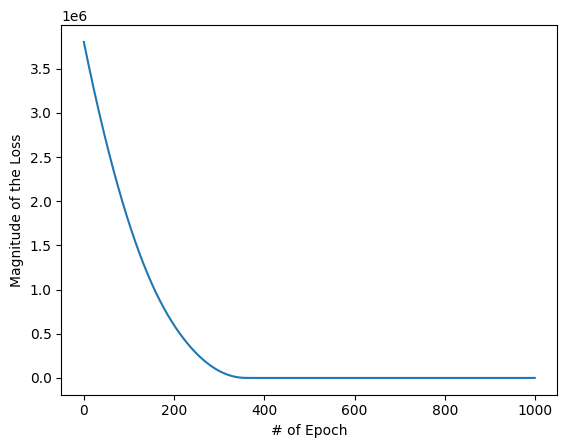

In [12]:
plt.xlabel('# of Epoch')
plt.ylabel('Magnitude of the Loss')
plt.plot(training.history['loss'])

In [13]:
# Awesome, the model is now learning.

# If the plot still shows erratic data, consider adding more layer to the neurons since the current on is too simple with only one dense layer:
from tensorflow import keras
model = keras.Sequential([
    keras.layers.Input(shape=(1,)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)
])

model.compile(
    optimizer=keras.optimizers.Adam(.01),
    loss='mean_squared_error'
)

In [14]:
training = model.fit(X_norm, y, epochs=1000)

Epoch 1/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 447us/step - loss: 5546049.5000
Epoch 2/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 431us/step - loss: 86139.3750
Epoch 3/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 436us/step - loss: 1471.6003
Epoch 4/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 428us/step - loss: 725.2684
Epoch 5/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 431us/step - loss: 348.2046
Epoch 6/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 430us/step - loss: 149.7366
Epoch 7/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 431us/step - loss: 73.9304
Epoch 8/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 426us/step - loss: 35.8640
Epoch 9/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step - loss: 15.7027
Epoch 10/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 432us/step - loss: 8.2186
Epoch 11/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step - loss: 4.3958
Epoch 12/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 495us/step - loss: 1.6515
Epoch 13/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step - loss: 1.0192
Epoch 14/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 429us

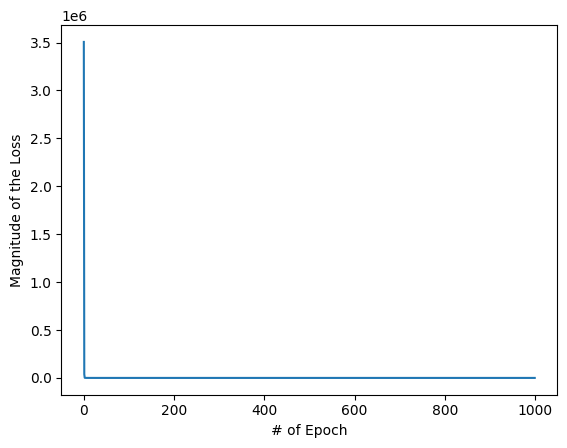

In [15]:
import matplotlib.pyplot as plt

plt.xlabel('# of Epoch')
plt.ylabel('Magnitude of the Loss')
plt.plot(training.history['loss'])

In [29]:
# Prediction
import numpy as np

c = 10

# Since we normalized the data of Input features, we have to normalize the value to predict before passing it to the model to predict
# Previously, we use Z-Score normalization, we need to be consistent
mean_X = X.mean()
std_X = X.std()

c_norm = (c - mean_X) / std_X
print(f"\nMean X: {mean_X}, STD X: {std_X};\nc: {c}, c_norm: {c_norm}")
# OUTPUT: Mean X: 1254.7360625, STD X: 726.3155691739618;
## c: 10, c_norm: -1.7137675623773803

print(f"\nc_norm shape: {c_norm.shape}")
# OUTPUT: c_norm shape: (), which means c_norm, like c, is a single scalar value.

# Since the `.predict` method expects a 2D array with the shape of ({sample_size}, 1), we need to reshape the single scalar value to a 2D array.
c_norm_reshape = np.array([c_norm]).reshape(-1,1)
print(f"\nc_norm_reshape: {c_norm_reshape}")
# OUTPUT: c_norm_reshape: [[-1.71376756]]

predictions = model.predict(c_norm_reshape)
print(f"\npredictions: {predictions}")
# OUTPUT: predictions: [[50.000027]]

# Convert the predictions from a 2D array back to a single scalar value
predictions_scalar = predictions[0][0]

print(f"\nPrediction: {c} Celsius is {predictions_scalar} fahrenheit.")


Mean X: 1254.7360625, STD X: 726.3155691739618;
c: 10, c_norm: -1.7137675623773803

c_norm shape: ()

c_norm_reshape: [[-1.71376756]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step

predictions: [[50.000027]]

Prediction: 10 Celsius is 50.00002670288086 fahrenheit.


In [17]:
print(model.layers[0].get_weights())

[array([[-4.8446320e-02,  2.8567601e-02,  4.0312185e+00, -5.2341789e-02,
        -2.4191622e-02,  3.6399035e+00,  4.4027119e+00, -5.1209610e-03,
         5.0026689e-02,  4.2795687e+00,  4.2244315e+00, -9.2079788e-02,
        -4.0713672e-02,  4.2293310e+00, -2.1994222e-02,  4.3282051e+00,
        -1.9781476e-02, -2.3204008e-02,  4.2311745e+00,  4.1873074e+00,
         3.9485517e+00,  4.3172112e+00,  4.2445455e+00,  4.3835330e+00,
         4.3896956e+00,  4.2439322e+00,  3.9141071e+00,  4.2300706e+00,
         1.3584543e-02,  4.3804216e+00,  4.2907610e+00,  4.2393560e+00,
         4.1502075e+00,  4.2824855e+00, -1.6637738e-03,  3.9590832e-02,
         4.1887970e+00, -3.9247226e-02,  4.2777104e+00,  4.4052982e+00,
        -1.6349323e-02,  1.8852849e-02,  1.6118139e-02,  4.3427010e+00,
         4.1773190e+00,  4.3799953e+00,  4.2249246e+00, -3.9617918e-02,
         4.1901588e+00,  4.3328395e+00,  4.0351739e+00,  4.3089147e+00,
         4.3220568e+00,  4.3913345e+00,  4.2978916e+00,  4.2874

<Axes: xlabel='Celsius', ylabel='Fahrenheit'>

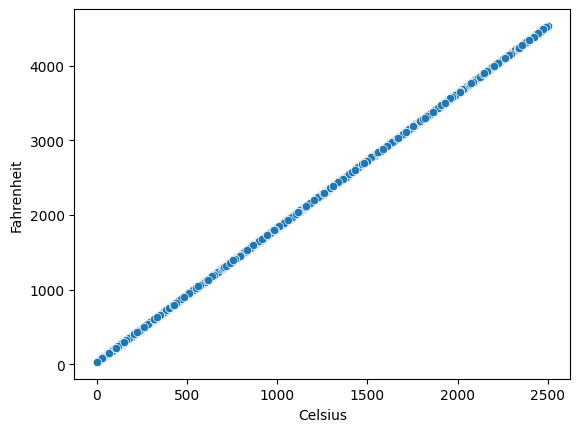

In [18]:
import seaborn as sns

sns.scatterplot(
    data=df,
    x='Celsius',
    y='Fahrenheit'
)